<a href="https://colab.research.google.com/github/sasquare/Bike_Sharing_Analysis/blob/main/Cyclic_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Cyclistic Bike-share Analysis***#

#**About the company**

Cyclistic is a bike-share program that features more than 5,800 bicycles and 700 docking stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Cyclistic’s marketing strategy relied on building general awareness and appealing to broad customer segments. One approach that helped make these things possible was the flexiblity of its pricing plans: single-ride passes, full-day passes, and annual membership. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual membership are Cyclistic members.

The director of marketing believes the company’s future success depends on maximizing the number of annual membership. Therefore, as a Data Analyst, our job is to find and analyze any pattern or trend in Cyclistic historical bike trip data to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, we can create a new marketing strategy to convert casual riders to annual members.

#Business Task
Identify any pattern or trend in Cyclistic historical bike trip data to understand the difference between casual riders and annual members in using Cyclistic bikes so we can create a new marketing strategy to convert casual riders to annual members.

#Data Preparation
I acquired the dataset from Divvy Tripdata, which is publicly available under a license provided by Motivate International Inc. The data spans from Jan 2021 to Dec 2021 (12 months) and contains over 5 million rows, making it unsuitable for direct handling in Spreadsheet, Tableau, and PowerBi.

To handle the dataset, I used SQL Server Management Studio (SSMS) for combining and cleaning the data thoroughly. After this process, I connected to Google Colab, where I performed final analysis and visualization using Python.

#Prepare the environment

In [ ]:
#@title *Install Necessary Librabry*
pip install pypyodbc
pip install pyodbc
pip install folium


In [ ]:
#@title *Import Necessary library*
import pandas as pd
import numpy as np
import folium
import pypyodbc as odbc
import pyodbc as odbc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#@title *Connect to the Data Base*
import pyodbc

DRIVER_NAME = 'ODBC Driver 18 for SQL Server'
SERVER_NAME = 'DESKTOP-I693HS9'
DATABASE_NAME = 'Cyclic'

connection_string = f"DRIVER={{{DRIVER_NAME}}};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};Trusted_Connection=Yes;Encrypt=No;"

conn = pyodbc.connect(connection_string)
print(conn)


In [ ]:
#@title *Retrieve the member_casual column*
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT rideable_type,member_casual,period FROM Cyclic"

# Execute the query and fetch the rows
df6 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df6.head(5)

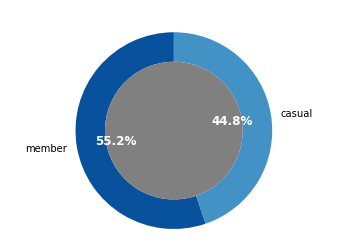

In [ ]:
#@title *Member Vs Casual riders*
# Count the number of member_casuals
member_casual_counts = df6['member_casual'].value_counts()

# Set a colormap for the doughnut chart (using "cool" colormap for a gradient effect)
colors = ['#08519c', '#4292c6', '#a1d9e6']

# Set a custom background color (a little bit darker)
plt.rcParams['axes.facecolor'] = '#1f2a3f'

# Create a figure and axis
fig, ax = plt.subplots()

# Create the doughnut chart
wedges, texts, autotexts = ax.pie(member_casual_counts, labels=member_casual_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Set font size and color for the percentage labels
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add a circle at the center of the doughnut chart to make it a doughnut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='grey')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
ax.set_title('Number of Member vs Casual', color='white')

# Display the doughnut chart
plt.show()

3. ***Observation:***
The dataset analysis shows that members constitute 55.2% of total riders, while casual riders account for 44.8%. This indicates a higher proportion of members compared to casual riders.

In [ ]:
#@title Default title text
cursor = conn.cursor()
cursor.execute("SELECT ride_id,rideable_type FROM Cyclic")

# Fetch and print the first row of the result
row = cursor.fetchone()
print(row)
# Close the database connection
conn.close()

In [ ]:
#@title Retrieved the ride_id and rideable_type from

conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT ride_id,rideable_type FROM Cyclic"

# Execute the query and fetch the rows
df = pd.read_sql(query, conn)

# Close the database connection
#conn.close()

# Perform analysis on the DataFrame
df.head(5)


In [ ]:
#@title Create a dataframe with the retrieved column
# Create a DataFrame
df = pd.DataFrame(df)

# Count the ride_id by ride_type and store as a DataFrame
ride_counts = df.groupby('rideable_type')['ride_id'].count().reset_index(name='count')

# Group the ride_id by ride_type and store as a DataFrame
ride_groups = df.groupby('rideable_type')['ride_id'].apply(list).reset_index(name='ride_ids')

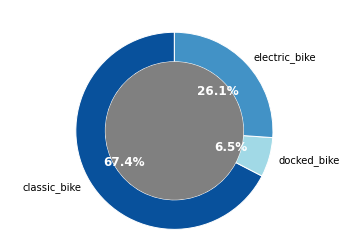

In [ ]:
#@title Visualized the Ride Counts by Rideable Type
# Data
rideable_types = ride_counts['rideable_type']
counts = ride_counts['count']

# Set a colormap for the doughnut chart (using "viridis" colormap for a gradient effect)
colors = ['#08519c',  '#a1d9e6', '#4292c6']

# Set a custom background color (a little bit darker)
plt.rcParams['axes.facecolor'] = '#8f2a3f'

# Create a figure and axis
fig, ax = plt.subplots()

# Create the doughnut chart with borders
wedges, texts, autotexts = ax.pie(counts, labels=rideable_types, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='white'))

# Set font size and color for the percentage labels
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add a circle at the center of the doughnut chart to make it a doughnut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='grey')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title with a white color
ax.set_title('Ride Counts by Rideable Type', color='white')

# Display the doughnut chart
plt.show()


1. ***Observation:***
The majority of riders, accounting for 67.4%, prefer the Classic bike as their ride of choice, while the Electric bike is the second most popular option, chosen by 26.1% of riders. In contrast, the Docked bike has the lowest preference, with only 6.5% of riders opting for it.

In [ ]:
#@title **Select rideable_type and the duration column from the database**
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT rideable_type,duration FROM Cyclic"

# Execute the query and fetch the rows
df1 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df1.head(5)

In [ ]:
#@title **Find the Outlier using the Z-Score**

# Calculate z-scores for duration column
z_scores = np.abs((df1['duration'] - df1['duration'].mean()) / df1['duration'].std())

# Set a threshold for z-scores to identify outliers
z_score_threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > z_score_threshold)[0]

outlier_indices




In [ ]:
#@title **Correct the outlier with the mean of duration column**
# Correct outliers by replacing them with the mean value
mean_duration = df1['duration'].mean()
df1.loc[outlier_indices, 'duration'] = mean_duration

# Print the corrected DataFrame
print(df1)

In [ ]:
#@title *Rename the duration column*
# Rename the 'duration' column to 'duration_in_Second'
df1 = df1.rename(columns={'duration': 'duration_in_Second'})

# Print the updated DataFrame
print(df1)

In [ ]:
#@title *Add another column duration_in_Minute*
# Convert duration_in_Second to duration_in_minute
df1['duration_in_minute'] = (df1['duration_in_Second'] / 60).round(1)

# Print the updated DataFrame
print(df1)
# Save the DataFrame to a CSV file
df1.to_csv('ride_duration.csv', index=False)

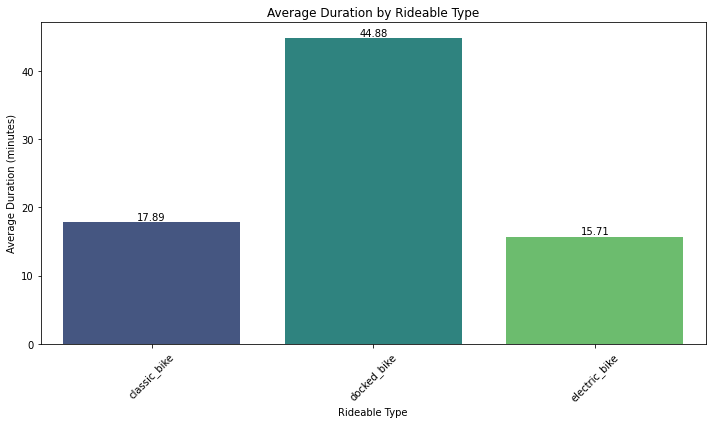

In [ ]:
#@title *Visualize the Avg duration by rideable type*
# Calculate average duration by rideable_type
avg_duration = df1.groupby('rideable_type')['duration_in_minute'].mean()

# Create a bar plot for average duration by rideable_type with gradient color
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(avg_duration))
ax = sns.barplot(x=avg_duration.index, y=avg_duration.values, palette=colors)
plt.xlabel('Rideable Type')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration by Rideable Type')
plt.xticks(rotation=45)

# Display duration on top of each column
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


2. ***Observation:***
The analysis shows significant variations in ride durations for different bike types. Docked bikes have the longest average ride time (78.24 minutes), classic bikes have the lowest (18.71 minutes), and electric bikes fall in between (15.71 minutes). These findings emphasize the distinct ride durations for each bike type.

<Figure size 576x432 with 0 Axes>

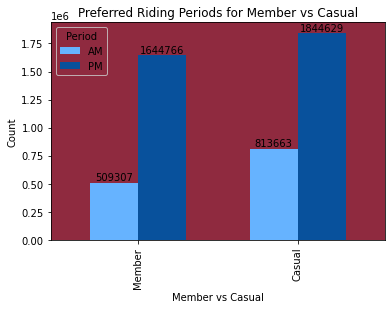

In [ ]:
#@title *Preferred riding period  for both member and casual rider*

# Count the number of member_casuals by period
period_counts = df6.groupby(['member_casual', 'period']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
# Set the color scheme for the bars
colors = ['#66b3ff','#08519c']

# Plot the bar chart for member vs casual by period with the customized colors
ax = period_counts.plot(kind='bar', stacked=False, width=0.6, color=colors)

# Add labels and title
plt.xlabel('Member vs Casual')
plt.ylabel('Count')
plt.title('Preferred Riding Periods for Member vs Casual')

# Display the actual values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust the x-axis tick labels
plt.xticks(range(len(period_counts.index)), ['Member', 'Casual'])

# Set the legend as 'period'
plt.legend(title='Period')

# Display the bar chart
plt.show()


4. ***Observation***
The analysis of the "member_casual" and "Period" column reveals a notable trend where both casual riders and members prefer to ride bikes in the evening. This suggests that the evening period is the most popular time for bike riding among both groups. Further investigation into the influencing factors could provide valuable insights.

In [ ]:
#@title *select member_casual, and duration column from the database*
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT member_casual,duration FROM Cyclic"

# Execute the query and fetch the rows
df3 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df3.head(5)

In [ ]:
#@title Default title text
# Convert duration_in_Second to duration_in_minute
df3['duration_in_minute'] = (df3['duration'] / 60).round(1)

# Print the updated DataFrame
print(df3)

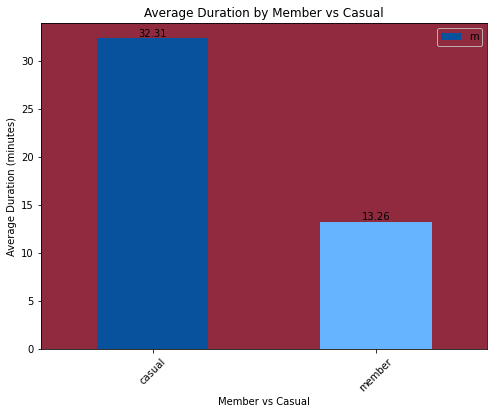

In [ ]:
#@title *Average ride duration of members and casual rider*
# Calculate the average duration by member_casuals
avg_duration = df3.groupby('member_casual')['duration_in_minute'].mean()

# Set the color scheme for the bars (deep blue and light blue)
colors = ['#08519c', '#66b3ff']

# Create a bar plot for average duration by rideable_type with the customized colors
plt.figure(figsize=(8, 6))
ax = avg_duration.plot(kind='bar', color=colors)  # Applying the custom colors
plt.xlabel('Member vs Casual')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration by Member vs Casual')
plt.xticks(rotation=45)

# Display the actual values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


5. ***Observation:***
Casual riders exhibit a significantly longer average riding duration of 32.31 minutes, which is more than twice the average duration of 13.6 minutes for members.

In [ ]:
#@title *Retrieve member ended at column*
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT member_casual,ended_at FROM Cyclic"

# Execute the query and fetch the rows
df4 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df4.head(5)

In [ ]:
#@title *add more column to retrieve the day and month*
# Convert 'ended_at' column to datetime type
df4['ended_at'] = pd.to_datetime(df4['ended_at'])

# Extract 'day' and 'month' from 'ended_at' column
df4['day'] = df4['ended_at'].dt.day
df4['month'] = df4['ended_at'].dt.month

# Print the updated DataFrame
print(df4)

In [ ]:
#@title Default title text
# Add 'day_of_week' column
df4['day_of_week'] = df4['ended_at'].dt.day_name()

# Display the updated DataFrame
print(df4)

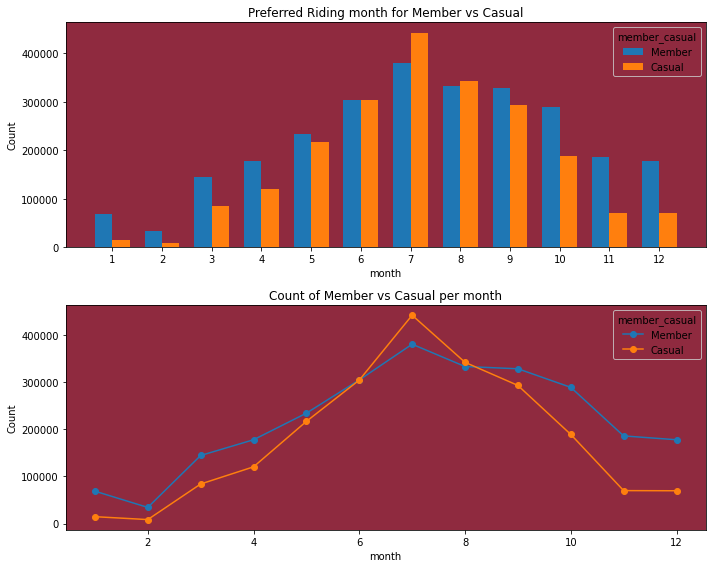

In [ ]:
#@title Visualize the preferred riding month for both member and casual riders
# Count the occurrences of each day of the week by 'member_casual'
month_counts = df4.groupby(['month', 'member_casual']).size().unstack()

# Plot the combined chart
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart
x = range(len(month_counts))
width = 0.35
ax1.bar(x, month_counts['member'], width=width, label='Member')
ax1.bar([i + width for i in x], month_counts['casual'], width=width, label='Casual')
ax1.set_xlabel('month')
ax1.set_ylabel('Count')
ax1.set_title('Preferred Riding month for Member vs Casual')
ax1.set_xticks([i + width/2 for i in x])
ax1.set_xticklabels(month_counts.index)
ax1.legend(title='member_casual')
ax1.grid(False)

# Line charts
member_counts = df4[df4['member_casual'] == 'member'].groupby('month').size()
casual_counts = df4[df4['member_casual'] == 'casual'].groupby('month').size()

ax2.plot(member_counts.index, member_counts.values, marker='o', label='Member')
ax2.plot(casual_counts.index, casual_counts.values, marker='o', label='Casual')
ax2.set_xlabel('month')
ax2.set_ylabel('Count')
ax2.set_title('Count of Member vs Casual per month')
ax2.legend(title='member_casual')
ax2.grid(False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined chart
plt.show()

6. ***Observation:***
The column and line chart analysis shows a consistent trend for both casual riders and members. July records the highest number of rides for both, indicating peak bike usage. February has the fewest rides for both groups, and from February to July, rides steadily increase before gradually declining towards December. This suggests a seasonal variation, with riders favoring warmer months and reduced usage during colder months.

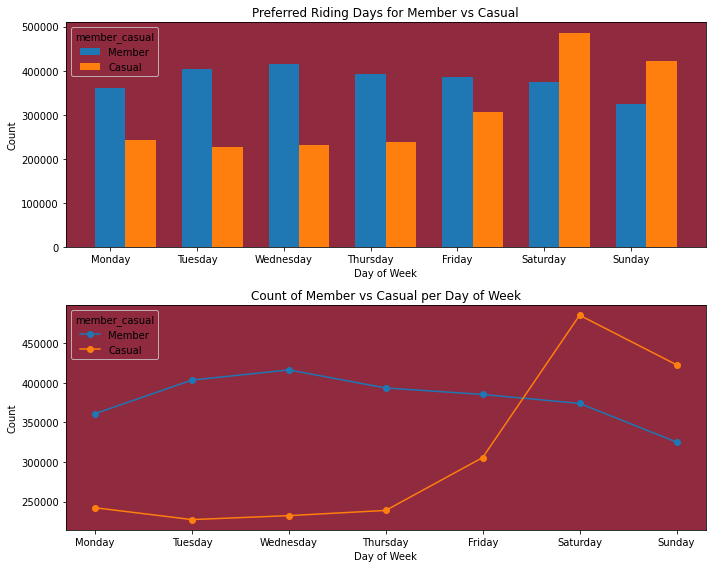

In [ ]:
#@title *Visualize the preferred riding day for both member and casual riders*
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df4['day_of_week'] = pd.Categorical(df4['day_of_week'], categories=day_order, ordered=True)

# Count the occurrences of each day of the week by 'member_casual'
day_of_week_counts = df4.groupby(['day_of_week', 'member_casual']).size().unstack()

# Plot the combined chart
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart
x = range(len(day_of_week_counts))
width = 0.35
ax1.bar(x, day_of_week_counts['member'], width=width, label='Member')
ax1.bar([i + width for i in x], day_of_week_counts['casual'], width=width, label='Casual')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Count')
ax1.set_title('Preferred Riding Days for Member vs Casual')
ax1.set_xticks(x)
ax1.set_xticklabels(day_order)
ax1.legend(title='member_casual')
ax1.grid(False)

# Line charts
member_counts = df4[df4['member_casual'] == 'member'].groupby('day_of_week').size()
casual_counts = df4[df4['member_casual'] == 'casual'].groupby('day_of_week').size()

ax2.plot(day_order, member_counts[day_order], marker='o', label='Member')
ax2.plot(day_order, casual_counts[day_order], marker='o', label='Casual')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Count')
ax2.set_title('Count of Member vs Casual per Day of Week')
ax2.legend(title='member_casual')
ax2.grid(False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined chart
plt.show()


7. ***Observation:***
The analysis of the column and line chart reveals distinct riding behavior patterns for member and casual riders throughout the week. Member riders show a peak on Wednesday, while casual riders have fewer rides on weekdays but experience a significant surge on weekends, with Sunday showing the highest peak, almost double that of member riders on Wednesdays.

In [ ]:
#@title *Retrieved the Latitude and longitude column*
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT member_casual,start_station_name,start_lat,start_lng FROM Cyclic"

# Execute the query and fetch the rows
df5 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df5.head(5)

In [ ]:
#@title Default title text
# Add a new column named 'index' with proper indexing
df5['index'] = df5.index

# Print the updated DataFrame
print(df5.head(20))

In [ ]:
#@title Default title text
# Print the updated DataFrame
df5.head(5)

In [ ]:
#@title *Visualized the top 10 start location and destination*
import folium

# Convert start_lat and start_lng to a standard geographic point format
df5['geopoint'] = df5.apply(lambda row: (row['start_lat'], row['start_lng']), axis=1)

# Sort the DataFrame by the number of occurrences of each start station
top_10_casual_stations = df5[df5['member_casual'] == 'casual']['start_station_name'].value_counts().nlargest(10)
top_10_member_stations = df5[df5['member_casual'] == 'member']['start_station_name'].value_counts().nlargest(10)

# Create a custom map style
map_style = "cartodbpositron"  # You can choose a different style here

# Create a folium map with the custom style
map = folium.Map(location=[df5['start_lat'].mean(), df5['start_lng'].mean()], zoom_start=12, tiles=map_style)

# Iterate over the top 10 casual stations and add orange markers
for rank, (station, count) in enumerate(top_10_casual_stations.items(), 1):
    station_data = df5[df5['start_station_name'] == station].iloc[0]
    marker_size = 10 + (rank * 2)  # Adjust the marker size based on the rank

    folium.CircleMarker(
        location=station_data['geopoint'],
        radius=marker_size,
        popup=f"Station: {station}<br>Count: {count}",
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(map)

    folium.Marker(
        location=station_data['geopoint'],
        popup=station,
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: orange;">{rank}. {station}</div>'
        )
    ).add_to(map)

# Iterate over the top 10 member stations and add dark grey markers
for rank, (station, count) in enumerate(top_10_member_stations.items(), 1):
    station_data = df5[df5['start_station_name'] == station].iloc[0]
    marker_size = 10 + (rank * 2)  # Adjust the marker size based on the rank

    folium.CircleMarker(
        location=station_data['geopoint'],
        radius=marker_size,
        popup=f"Station: {station}<br>Count: {count}",
        color='darkgrey',
        fill=True,
        fill_color='darkgrey',
        fill_opacity=0.6
    ).add_to(map)

    folium.Marker(
        location=station_data['geopoint'],
        popup=station,
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: darkgrey;">{rank}. {station}</div>'
        )
    ).add_to(map)

# Display the map
map


8 **Observation**
Based on the map visualization, the top ten locations where riders start their journeys have been highlighted. It is evident that a significant proportion of riders prefer to start their journeys at the following locations, listed in descending order of popularity:

*   Well St & Em St
*   Indiana Ave & Roosevelt Rd
*   Clark St & Lincoln Ave
*   Well St & Concord Ln
*   Lake Shore Dr & Monroe
*   Shedd Aquarium
*   Theater on the Lake
*   Michigan Ave & Oak St
*   Millennium Park
*   Streeter Dr & Grand Ave

These locations represent the most frequented starting points for riders, with the first location being the most popular and the tenth location rounding out the top ten. This observation highlights the significance of these specific locations as preferred starting points for riders in the analyzed dataset.



---



##OBSERVATION RECOMENDATION AND CONCLUSSION



---


Based on the analysis of Cyclistic's historical bike trip data, several key observations have been made regarding the difference between casual riders and annual members. These insights can inform the development of a new marketing strategy to convert casual riders into annual members.


---



* ****Preference for Pricing Plans:**** Casual riders tend to opt for single-ride passes or full-day passes, while annual members choose the annual membership. This indicates that there is a distinct preference for different pricing plans among the two rider segments.





*   ****Riding Duration:**** Casual riders have a significantly longer average riding duration compared to annual members. This suggests that casual riders may have a different usage pattern and potentially view bike rides as leisure or recreational activities.




*  **Seasonal Riding Patterns:** Both casual riders and annual members exhibit similar seasonal trends, with peak usage occurring in the summer months and lower usage during colder months. This indicates that weather and seasonality play a significant role in bike usage.




*   **Weekly Riding Patterns:** Casual riders exhibit a higher surge in rides during weekends, while member riders show a more consistent pattern throughout the weekdays.




---


**Based on these observations, the following recommendations are proposed to convert casual riders to annual members:**


---



*  Concentrate efforts on the top starting locations identified in the analysis, as they attract a significant number of riders. These locations have already demonstrated popularity and high rider engagement.



*   Tailor marketing messages to highlight the convenience and value of longer-term bike usage, emphasizing how an annual membership can provide more flexibility and cost savings for regular riders.


*  Develop targeted promotional campaigns highlighting the benefits and cost-effectiveness of the annual membership plan to encourage casual riders to upgrade their membership.



*  Create targeted weekend campaigns to attract casual riders with offers such as discounted weekend memberships or special weekend ride events, aimed at capturing their weekend riding preferences and encouraging them to become annual members.



*   Emphasize the convenience, flexibility, and cost savings of long-term bike usage with an annual membership.



*   Offer seasonal promotions, discounts, or incentives during peak summer months to attract casual riders and encourage them to become annual members.




*   Create weekend-specific campaigns and events tailored to the riding preferences of casual riders, aiming to convert them into annual members.



---


By implementing these recommendations, Cyclistic can strategically target casual riders and effectively convert them into annual members, thus increasing the number of annual memberships and contributing to the company's future success.





